<a href="https://colab.research.google.com/github/MMucahit/PyhtonDeepLearningFrancoisChollet/blob/main/CNN_Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resimlerin Okunması ve Depolanması

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15768867342308413651, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11154422528
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3685499426908421733
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [5]:
import os, shutil

In [7]:
orginal_dataset_dir = r'/content/drive/MyDrive/Colab Notebooks' ## Veri setinin bulunduğu dizini

In [8]:
base_dir = r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small' ## Küçültülmüş veri setinin dizini
# os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train') ## Eğitim setinin dizini
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation') ## Doğrulama setinin dizini 
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test') ## Test setinin dizini
# os.mkdir(test_dir)

In [10]:
train_cats_dir = os.path.join(train_dir, 'cats') ## Kedi eğitim setinin dizini
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') ## Köpek eğitim setinin dizini
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') ## Kedi doğrulama setinin dizini
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') ## Köpek doğrulama setinin dizini
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') ## Kedi test setinin dizini
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') ## Köpek test setinin dizini
# os.mkdir(test_dogs_dir)

In [ ]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(orginal_dataset_dir + '/train', fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(orginal_dataset_dir + '/train', fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)   

# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(orginal_dataset_dir + '/train', fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)

In [ ]:
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(orginal_dataset_dir + '/train', fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(orginal_dataset_dir + '/train', fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)   

# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#     src = os.path.join(orginal_dataset_dir + '/train', fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

Ağın İnşası

In [11]:
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from keras.models import Sequential

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])

Veri Önişleme

In [ ]:
## Resim dosyalarını oku.
## JPEG içeriğini kodçözerek RGB görüntüye dönüştür.
## RGB görüntüyü ondalık tensörlere dönüştür.
## RGB görüntüyü (0,1) aralığına ölçekle

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale= 1./255) ## Tüm resimleri 1/255' le ölçekler
test_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [ ]:
## Bizim örneğimizde yığın büyüklüğü 20 ve 100 yığın alınacak toplamda 2000 veri eder.
history = model.fit(
    train_generator,
    steps_per_epoch= 100, ## Üreteçden kaç defa yığın alınacağı ve kaç defa gradyan iniş çalışacağını
    epochs= 30,
    validation_data= validation_generator,
    validation_steps= 50 ## Doğrulama için kaç defa yığın alınaçağı sayını belirler
)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 16s 120ms/step - loss: 0.8872 - accuracy: 0.4864 - val_loss: 0.6881 - val_accuracy: 0.6140
Epoch 2/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6914 - accuracy: 0.5480 - val_loss: 0.6512 - val_accuracy: 0.5810
Epoch 3/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6528 - accuracy: 0.6581 - val_loss: 0.6263 - val_accuracy: 0.6650
Epoch 4/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5729 - accuracy: 0.7234 - val_loss: 0.6020 - val_accuracy: 0.6770
Epoch 5/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5437 - accuracy: 0.7441 - val_loss: 0.5620 - val_accuracy: 0.7160
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4615 - accuracy: 0.7893 - val_loss: 0.6020 - val_accuracy: 0.7120
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4064 - accuracy: 0.8128 - val_loss: 0.6151 - val_ac

Eğitim kaybı ve başarımı Çizdirme

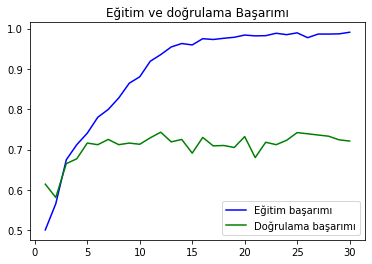

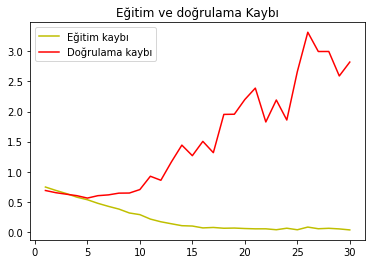

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

plt.show()

In [ ]:
## Bu şekiller aşırı uydurma göstergesidir. Eğitim başarımı doğrusal olarak artarak neredeyse %100'e ulaşırken doğrulama %72'de takılıp kalıyor.(5 epok olduğu için gözükmüyor çünkü işlem uzun oldugu için 5 epok denedim.)
## Bu sorundan ağırlık azalımı(L2 regularizasyon) yada iletim sönümü(Dropout) ile başa çıkabiliriz. Ama bilgisayarlı görüde oldukça sık kullanılan bir teknik kullanacağız: Veri seti çeşitlendirme

Veri Seti Çeşitlendirme

In [ ]:
## Sonsuz veri olduğunda modeliniz var olan tüm veri dağılımlarını ortaya çıkarabilir ve asla aşırı uydurmaz. Veri çeşitlendirme eldeki verilerden birtakım dönüşümler ile gerçeğe yakın daha fazla eğitim verisi oluşturur. Amaç, eğitim sırasında modelinizin aynı resmi ikinci kez görmemesidir. Bu da modelinizin daha çok örüntü aramasını ve daha iyi genelleştirmesini sağlar.

In [17]:
datagen = ImageDataGenerator(
    rotation_range= 40, ## Derece cinsinden rastgele döndürme açısı
    width_shift_range= 0.2,
## Yatayda dikeyde kaydırma oranı(toplam genişlik ve yüksekliğe oranla)
    height_shift_range= 0.2,
    shear_range= 0.2, ## burkma oranı
    zoom_range= 0.2, ## yakınlaşma oranı
    horizontal_flip= True, ## dikeyde resmi döndürme
    fill_mode= 'nearest' ## işlemlerden sonra ortaya çıkan fazla noktaları doldurma modu
)

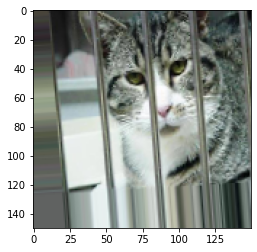

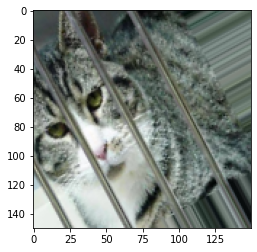

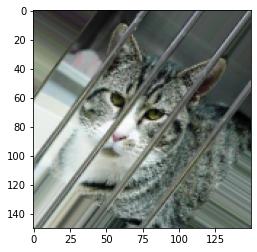

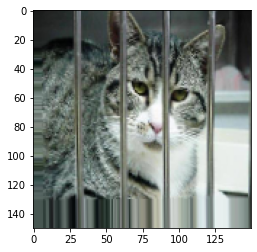

In [22]:
from keras.preprocessing import image ## Görüntü işleme modülü
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size= (150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size= 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()    

Modele İletim Sönümü Eklemek

In [23]:
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from keras.models import Sequential

In [24]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

test_datagen= ImageDataGenerator(rescale= 1./ 255) ## Doğrulama verisi çeşitlendirilmeyecek.

train_generator = train_datagen.flow_from_directory(
    train_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
## Bizim örneğimizde yığın büyüklüğü 20 ve 100 yığın alınacak toplamda 2000 veri eder.
history = model.fit(
    train_generator,
    steps_per_epoch= 100, ## Üreteçden kaç defa yığın alınacağı ve kaç defa gradyan iniş çalışacağını
    epochs= 100,
    validation_data= validation_generator,
    validation_steps= 50 ## Doğrulama için kaç defa yığın alınaçağı sayını belirler
)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 21s 208ms/step - loss: 0.7862 - accuracy: 0.4978 - val_loss: 0.8510 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 20s 203ms/step - loss: 0.7126 - accuracy: 0.5260 - val_loss: 0.6591 - val_accuracy: 0.6150
Epoch 3/100
100/100 [==============================] - 20s 203ms/step - loss: 0.7086 - accuracy: 0.6045 - val_loss: 0.6660 - val_accuracy: 0.5890
Epoch 4/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6640 - accuracy: 0.6002 - val_loss: 0.6306 - val_accuracy: 0.6390
Epoch 5/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6623 - accuracy: 0.6128 - val_loss: 0.6807 - val_accuracy: 0.6450
Epoch 6/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6472 - accuracy: 0.6560 - val_loss: 0.6058 - val_accuracy: 0.6580
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6225 - accuracy: 0.6605 - val_loss: 0.5859 -

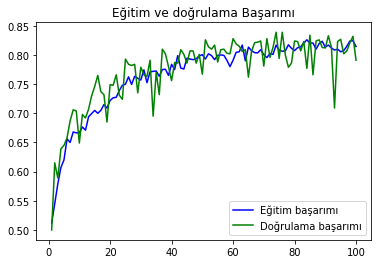

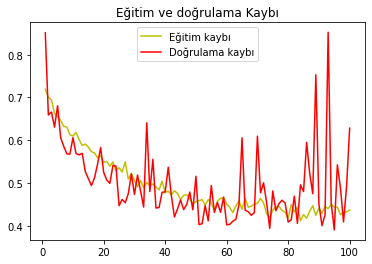

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

VGG16 Evrişim Tabanı Oluşturmak

In [17]:
from keras.applications import VGG16

conv_base = VGG16(weights= 'imagenet', include_top= False, input_shape= (150,150,3))
conv_base.summary()

Veri Çeşitlendirme olmadan Hızlı Öznitelik Çıkarma

In [ ]:
## Bu noktada iki farklı yol vardır:
## İlk yol: Evrişimli tabanı kendi veri setinizde çalıştırıp sonuçlarını Numpy dizisi olarak
## diske kaydedip bunu daha sonra kendi başına bir girdi olarak düşünüp tam bağlı sınıflandırıcıya göndermek.
## Bu çözüm basit ve hızlı olacaktır. Çünkü evrişimli taban bu sürecin en maliyetli parçası ve
## her resim evrişim tabandan bir kere geçecektir. Bu yüzden veri çeşitlendirme kullanamayız.

In [19]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [20]:
base_dir = r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale= 1./255)
batch_size = 20

In [5]:
## Görüntü ve Etiketleri Numpy dizisine dönüştüreceğiz.
##  Conv_base modelinin predict metodu ile nitelik haritasını çıkarağız.
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels
    
## Çıkardığımız özniteliklerin boyutu (samples, 4,4,512)
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)           

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
## Tam bağlı modele beslemeden önce (samples, 4*4*512) boyutuna çeviriyoruz.
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

ÖnEğitimli evrişimli tabana Tam Bağlı bir Sınıflandırıcı Tanımlamak

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

In [8]:
## Düzenlileştirme için Dropout kullandık.
model = Sequential()
model.add(Dense(256, activation= 'relu', input_dim= 4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(optimizer= optimizers.RMSprop(lr= 2e-5), loss= 'binary_crossentropy', metrics= ['accuracy'])

history = model.fit(train_features, train_labels, epochs= 30, batch_size= 20, validation_data= (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 11ms/step - loss: 0.6852 - accuracy: 0.5850 - val_loss: 0.4485 - val_accuracy: 0.8060
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4683 - accuracy: 0.7692 - val_loss: 0.3593 - val_accuracy: 0.8690
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3795 - accuracy: 0.8395 - val_loss: 0.3300 - val_accuracy: 0.8620
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3168 - accuracy: 0.8715 - val_loss: 0.2968 - val_accuracy: 0.8860
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2836 - accuracy: 0.8789 - val_loss: 0.2864 - val_accuracy: 0.8910
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2716 - accuracy: 0.8785 - val_loss: 0.2765 - val_accuracy: 0.8920
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2353 - accuracy: 0.9146 - val_loss: 0.2654 - val_accuracy: 0.8920
Epoch

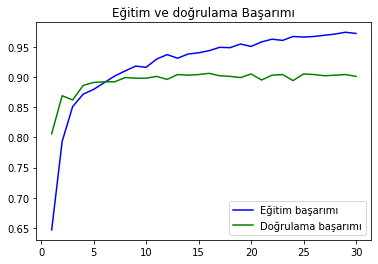

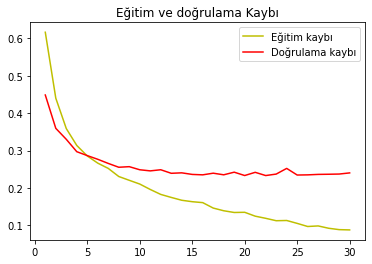

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

In [ ]:
## Veri Çeşitlendirme kullanmadığımız için başarım yüksek olmasına rağmen aşırı uyum var hala

Veri Seti Çeşitlendirmesi ile Öznitelik Çıkarımı

In [ ]:
## ikinici yol: Modeliniz sahip olduğunuz(conv_base) üzerine Dense katmanı eklemek ve tüm girdileri
## en baştan çalıştırmak. Bu şekilde veri çeşitlendirmeyi kullanmak mümkün olacaktır.
## Ama bütün resimler her epokda evrişimli katmandan geçeceğinden maliyetli olacaktır.

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights= 'imagenet', include_top= False, input_shape= (150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [3]:
base_dir = r'/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale= 1./255)
batch_size = 20

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [5]:
## Evrişimli taban üzerine tamamen bağlı katman ekleme
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [9]:
conv_base.trainable = False

In [10]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [14]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [19]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

test_datagen= ImageDataGenerator(rescale= 1./ 255) ## Doğrulama verisi çeşitlendirilmeyecek.

train_generator = train_datagen.flow_from_directory(
    train_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

model.compile(optimizer= optimizers.RMSprop(lr= 2e-5), loss= 'binary_crossentropy', metrics= ['accuracy'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
## Dondurulmuş evrişim katmanı olan modeli eğitmek
## Bizim örneğimizde yığın büyüklüğü 20 ve 100 yığın alınacak toplamda 2000 veri eder.
history = model.fit(
    train_generator,
    steps_per_epoch= 100, ## Üreteçden kaç defa yığın alınacağı ve kaç defa gradyan iniş çalışacağını
    epochs= 30,
    validation_data= validation_generator,
    validation_steps= 50 ## Doğrulama için kaç defa yığın alınaçağı sayını belirler
)

model.save('cats_and_dogs_small_3.h5')

Epoch 1/30
100/100 [==============================] - 30s 287ms/step - loss: 0.8809 - accuracy: 0.7129 - val_loss: 0.2673 - val_accuracy: 0.8910
Epoch 2/30
100/100 [==============================] - 28s 282ms/step - loss: 0.3733 - accuracy: 0.8284 - val_loss: 0.2650 - val_accuracy: 0.8920
Epoch 3/30
100/100 [==============================] - 28s 282ms/step - loss: 0.3659 - accuracy: 0.8494 - val_loss: 0.2603 - val_accuracy: 0.8940
Epoch 4/30
100/100 [==============================] - 28s 282ms/step - loss: 0.3327 - accuracy: 0.8384 - val_loss: 0.2588 - val_accuracy: 0.8960
Epoch 5/30
100/100 [==============================] - 28s 284ms/step - loss: 0.3466 - accuracy: 0.8448 - val_loss: 0.2574 - val_accuracy: 0.8930
Epoch 6/30
100/100 [==============================] - 29s 288ms/step - loss: 0.3410 - accuracy: 0.8561 - val_loss: 0.2559 - val_accuracy: 0.8920
Epoch 7/30
100/100 [==============================] - 29s 287ms/step - loss: 0.3222 - accuracy: 0.8585 - val_loss: 0.2557 - val_ac

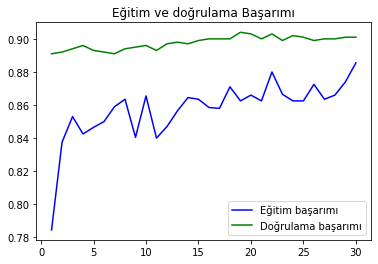

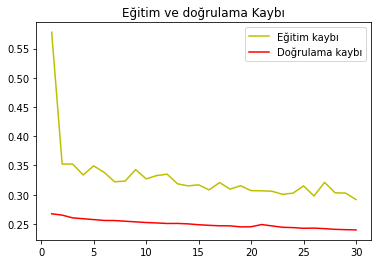

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

Hassas Ayar (Fine Tunning)

In [ ]:
## 1- Öneğitimli bir ağın üzerine kendi ağınızı ekleyin
## 2- Baz modeli dondurun (Evrişimli katman)
## 3- Eklediğiniz bölümü eğitin
## 4- Baz modelden katmanlar çözün
## 5- Yeni eklenen ve öneğitimli ağdan çözülen katmanlarla beraber eğitin

In [ ]:
## Şu ana kadar ilk 3 adımı tamamladık. Şimdi 4.adım olan conv_base i çözeceğiz ve içinde
## bazı katmanları dondurcağız. Son 3 katmana hassas ayar yapacağız. block5_conv1,2,3 çözülecek.
## İlk katmanlar daha jenerik, yeniden kullanılabilir nitelikleri kodlar, yukarı doğru katmanlar
## daha özel nitelikleri kodlar. Dolayısıyla bu özel niteliklere hassas ayar yapmak mantıklıdır.

Belli bir noktaya kadar olan katmanları dondurma

In [22]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False       

In [23]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [24]:
print('This is the number of trainable weights ', len(model.trainable_weights))

This is the number of trainable weights  10


In [25]:
## Modele hassas ayar yapmak
## RMSprop öğrenme oranını çok küçük seçmeliyiz. Bunun amacı çözdüğünüz üç katmanın öğrendiği gösterimlerdeki-
## değişimleri sınırlandırmaktadır. Çok büyük değişimler bu gösterimlere zarar verebilmektedir.

model.compile(optimizer= optimizers.RMSprop(lr= 1e-5), loss= 'binary_crossentropy', metrics= ['accuracy'])
history = model.fit(train_generator,
                    steps_per_epoch= 100,
                    epochs= 30,
                    validation_data= validation_generator,
                    validation_steps= 50
)
model.save('cats_and_dogs_small_4.h5')

Epoch 1/30
100/100 [==============================] - 31s 295ms/step - loss: 0.6506 - accuracy: 0.6362 - val_loss: 0.3556 - val_accuracy: 0.8470
Epoch 2/30
100/100 [==============================] - 29s 293ms/step - loss: 0.4077 - accuracy: 0.8143 - val_loss: 0.2767 - val_accuracy: 0.8820
Epoch 3/30
100/100 [==============================] - 29s 291ms/step - loss: 0.3233 - accuracy: 0.8523 - val_loss: 0.2219 - val_accuracy: 0.9020
Epoch 4/30
100/100 [==============================] - 29s 291ms/step - loss: 0.2855 - accuracy: 0.8729 - val_loss: 0.2102 - val_accuracy: 0.9040
Epoch 5/30
100/100 [==============================] - 29s 292ms/step - loss: 0.2817 - accuracy: 0.8794 - val_loss: 0.2058 - val_accuracy: 0.9020
Epoch 6/30
100/100 [==============================] - 29s 291ms/step - loss: 0.2875 - accuracy: 0.8722 - val_loss: 0.2066 - val_accuracy: 0.9140
Epoch 7/30
100/100 [==============================] - 29s 290ms/step - loss: 0.2787 - accuracy: 0.8838 - val_loss: 0.1905 - val_ac

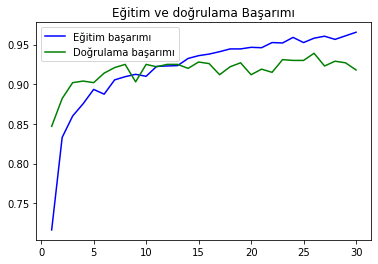

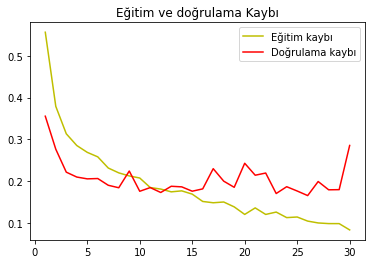

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

In [27]:
def smooth_curve(points, factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points    

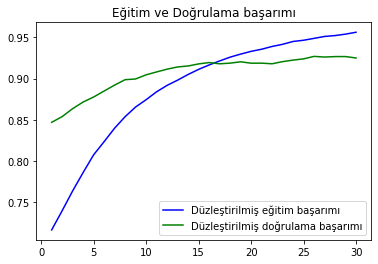

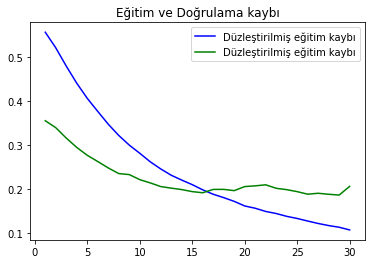

In [28]:
plt.plot(epochs, smooth_curve(acc), 'b', label= 'Düzleştirilmiş eğitim başarımı')
plt.plot(epochs, smooth_curve(val_acc), 'g', label= 'Düzleştirilmiş doğrulama başarımı')
plt.title('Eğitim ve Doğrulama başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'b', label= 'Düzleştirilmiş eğitim kaybı')
plt.plot(epochs, smooth_curve(val_loss), 'g', label= 'Düzleştirilmiş eğitim kaybı')
plt.title('Eğitim ve Doğrulama kaybı')
plt.legend()

plt.show()

In [30]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 6s 122ms/step - loss: 0.2860 - accuracy: 0.9090
test acc: 0.9089999794960022


ImageNet + Tam Bağlı

In [34]:
conv_base.trainable = True

In [35]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [36]:
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

test_datagen= ImageDataGenerator(rescale= 1./ 255) ## Doğrulama verisi çeşitlendirilmeyecek.

train_generator = train_datagen.flow_from_directory(
    train_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, ## Hedef dizin
    target_size= (150,150), ## Tüm resimleri boyutlandırma
    batch_size= 20, 
    class_mode= 'binary' ## binary_crossentropy kullandığımız için ikili etiketler gerekiyor.
)

model.compile(optimizer= optimizers.RMSprop(lr= 2e-5), loss= 'binary_crossentropy', metrics= ['accuracy'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch= 100, ## Üreteçden kaç defa yığın alınacağı ve kaç defa gradyan iniş çalışacağını
    epochs= 30,
    validation_data= validation_generator,
    validation_steps= 50 ## Doğrulama için kaç defa yığın alınaçağı sayını belirler
)

model.save('cats_and_dogs_small_5.h5')

Epoch 1/30
100/100 [==============================] - 44s 401ms/step - loss: 0.4779 - accuracy: 0.7625 - val_loss: 0.1955 - val_accuracy: 0.9230
Epoch 2/30
100/100 [==============================] - 40s 399ms/step - loss: 0.2337 - accuracy: 0.9080 - val_loss: 0.1262 - val_accuracy: 0.9410
Epoch 3/30
100/100 [==============================] - 40s 399ms/step - loss: 0.1665 - accuracy: 0.9286 - val_loss: 0.1109 - val_accuracy: 0.9560
Epoch 4/30
100/100 [==============================] - 40s 399ms/step - loss: 0.1375 - accuracy: 0.9455 - val_loss: 0.1575 - val_accuracy: 0.9400
Epoch 5/30
100/100 [==============================] - 40s 399ms/step - loss: 0.1536 - accuracy: 0.9430 - val_loss: 0.1034 - val_accuracy: 0.9620
Epoch 6/30
100/100 [==============================] - 40s 399ms/step - loss: 0.1234 - accuracy: 0.9505 - val_loss: 0.1050 - val_accuracy: 0.9640
Epoch 7/30
100/100 [==============================] - 40s 399ms/step - loss: 0.0930 - accuracy: 0.9672 - val_loss: 0.1112 - val_ac

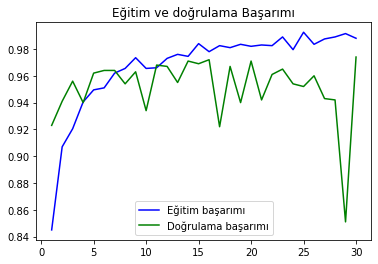

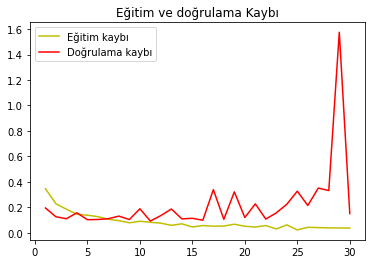

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

In [39]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 6s 121ms/step - loss: 0.3085 - accuracy: 0.9590
test acc: 0.9589999914169312


In [40]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False    

In [41]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [42]:
## Modele hassas ayar yapmak
## RMSprop öğrenme oranını çok küçük seçmeliyiz. Bunun amacı çözdüğünüz üç katmanın öğrendiği gösterimlerdeki-
## değişimleri sınırlandırmaktadır. Çok büyük değişimler bu gösterimlere zarar verebilmektedir.

model.compile(optimizer= optimizers.RMSprop(lr= 1e-5), loss= 'binary_crossentropy', metrics= ['accuracy'])
history = model.fit(train_generator,
                    steps_per_epoch= 100,
                    epochs= 30,
                    validation_data= validation_generator,
                    validation_steps= 50
)
model.save('cats_and_dogs_small_6.h5')

Epoch 1/30
100/100 [==============================] - 31s 298ms/step - loss: 0.2123 - accuracy: 0.9080 - val_loss: 0.1253 - val_accuracy: 0.9600
Epoch 2/30
100/100 [==============================] - 29s 294ms/step - loss: 0.0241 - accuracy: 0.9931 - val_loss: 0.1415 - val_accuracy: 0.9630
Epoch 3/30
100/100 [==============================] - 29s 293ms/step - loss: 0.0150 - accuracy: 0.9956 - val_loss: 0.1275 - val_accuracy: 0.9740
Epoch 4/30
100/100 [==============================] - 30s 295ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.1254 - val_accuracy: 0.9740
Epoch 5/30
100/100 [==============================] - 29s 292ms/step - loss: 0.0114 - accuracy: 0.9956 - val_loss: 0.1381 - val_accuracy: 0.9730
Epoch 6/30
100/100 [==============================] - 30s 296ms/step - loss: 0.0170 - accuracy: 0.9961 - val_loss: 0.1385 - val_accuracy: 0.9760
Epoch 7/30
100/100 [==============================] - 29s 295ms/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 0.1224 - val_ac

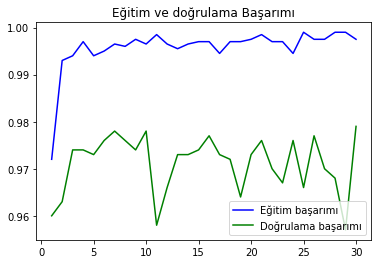

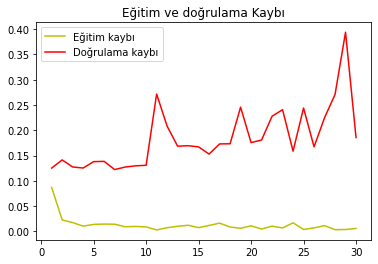

In [44]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Eğitim başarımı')
plt.plot(epochs, val_acc, 'g', label= 'Doğrulama başarımı')
plt.title('Eğitim ve doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label= 'Eğitim kaybı')
plt.plot(epochs, val_loss, 'r', label= 'Doğrulama kaybı')
plt.title('Eğitim ve doğrulama Kaybı')
plt.legend()

In [45]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 6s 122ms/step - loss: 0.3065 - accuracy: 0.9660
test acc: 0.9660000205039978
